In [1]:

from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn import preprocessing

In [2]:
data = pd.read_csv("DataSet.csv")

In [3]:
columns_name = ['CRIM' ,'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B' ,'LSTAT', 'MEDV']
TARGET = 'MEDV'

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      479 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [5]:
nul_data = data.isnull()
missed_col = []
for column_name in columns_name:
  if(nul_data[column_name].sum() != 0):
    missed_col.append(column_name)

  print(column_name + ": " +  str(nul_data[column_name].sum()))
for column_name in columns_name:
  print(column_name + ": " + str(nul_data[column_name].sum()/len(data)))

CRIM: 0
ZN: 0
INDUS: 0
CHAS: 26
NOX: 0
RM: 0
AGE: 0
DIS: 27
RAD: 0
TAX: 0
PTRATIO: 0
B: 20
LSTAT: 0
MEDV: 54
CRIM: 0.0
ZN: 0.0
INDUS: 0.0
CHAS: 0.05138339920948617
NOX: 0.0
RM: 0.0
AGE: 0.0
DIS: 0.0533596837944664
RAD: 0.0
TAX: 0.0
PTRATIO: 0.0
B: 0.039525691699604744
LSTAT: 0.0
MEDV: 0.1067193675889328


In [6]:
print(missed_col)

['CHAS', 'DIS', 'B', 'MEDV']


<Axes: >

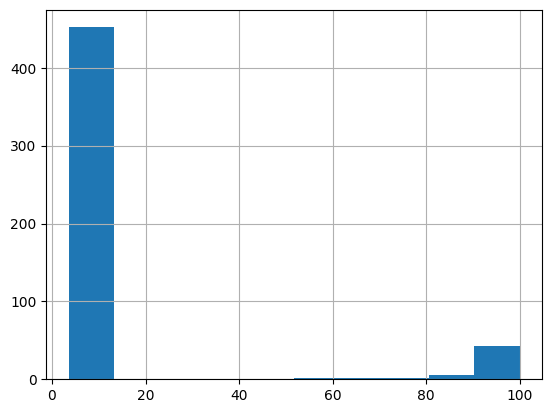

In [7]:
data.RM.hist()

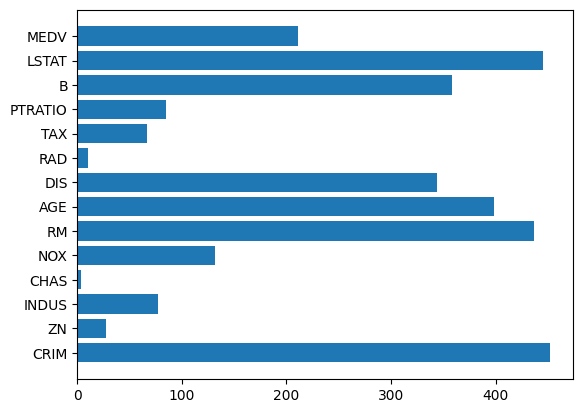

In [8]:
unique_numbers = []
for column_name in columns_name:
   unique_numbers.append(len(data[column_name].unique()))
x  = np.arange(1, len(columns_name)+1,1)
plt.barh(x,unique_numbers , align='center')
plt.yticks(x  , columns_name)
plt.show()

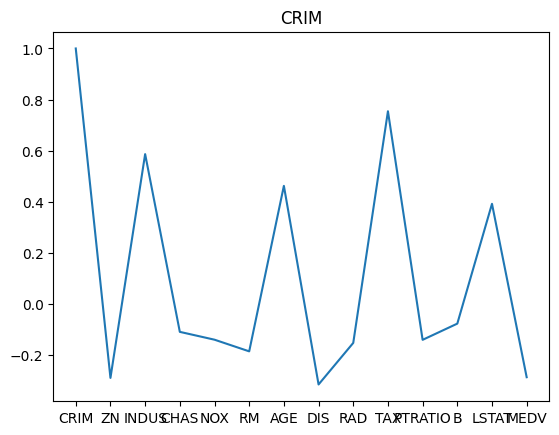

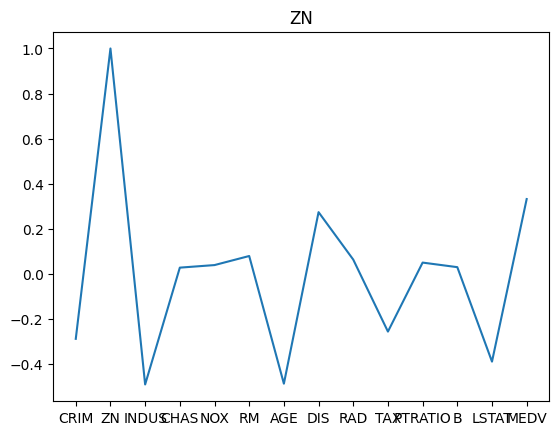

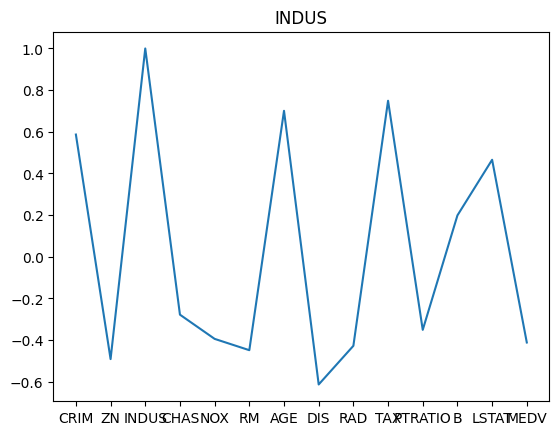

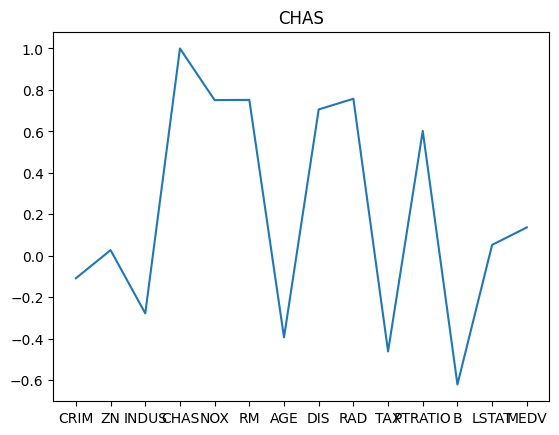

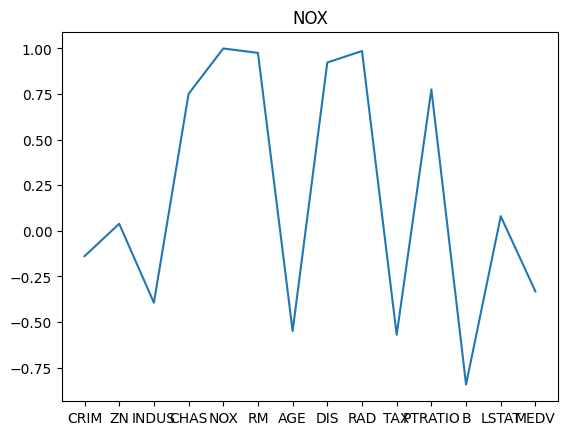

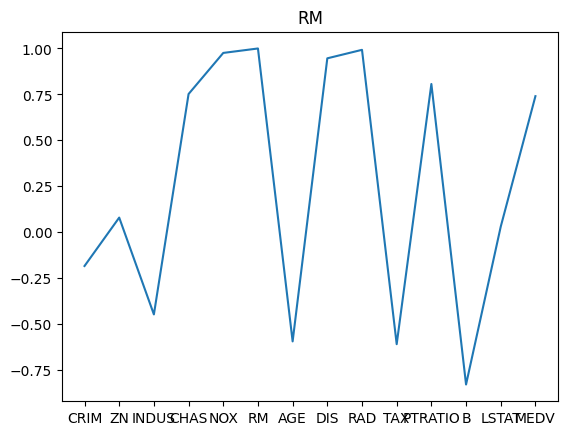

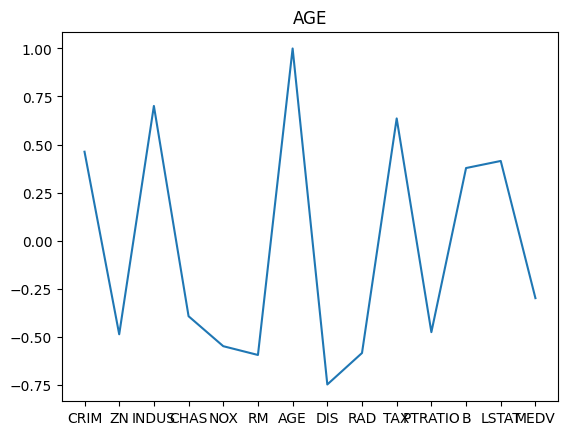

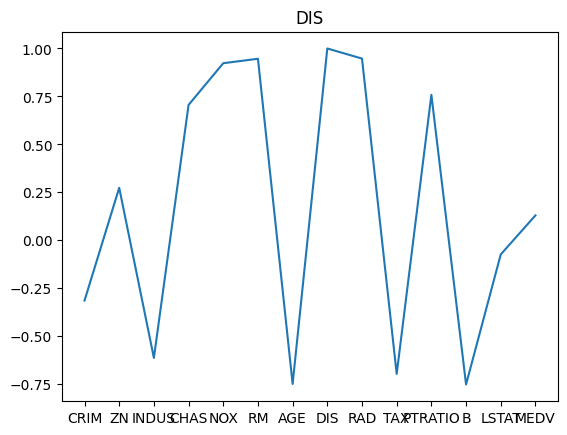

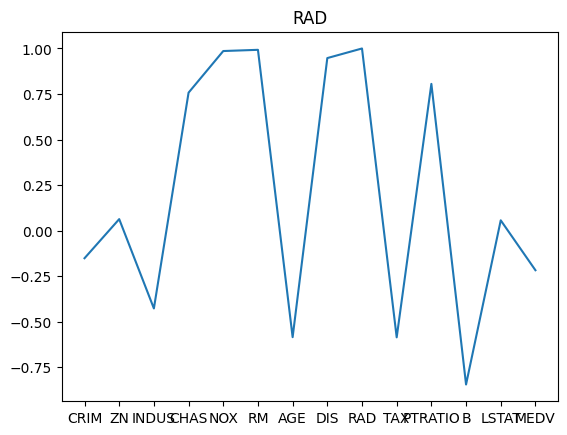

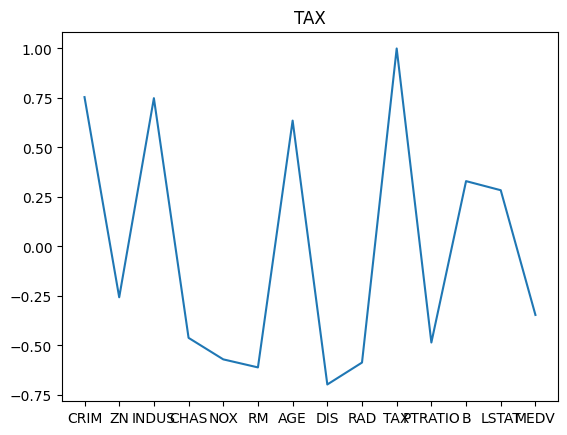

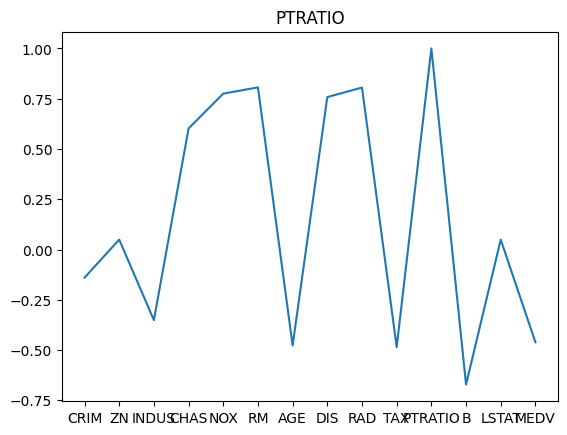

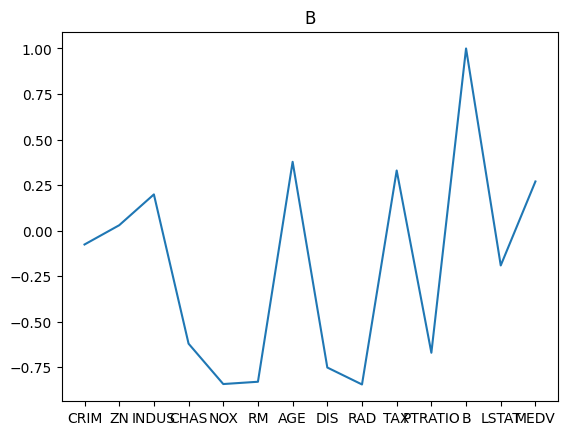

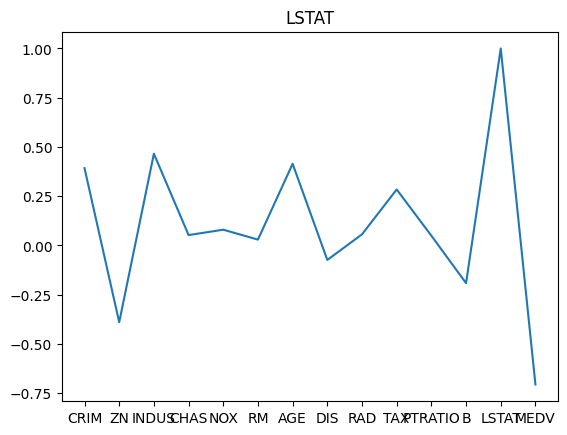

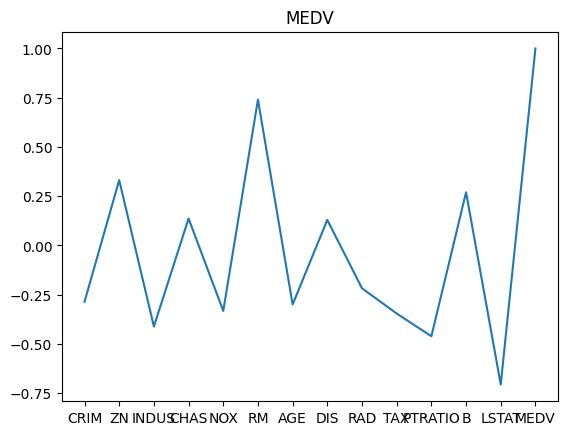

maximum correlation with target : RM


In [9]:
corrs = []
corrs_with_target = []
for column_name in columns_name :
  corrs.append(data.corr()[column_name])

for i in range(len(corrs)):
  corr = corrs[i]
  corrs_with_target.append(corr[TARGET])
  plt.plot(corr)
  plt.title(columns_name[i])
  plt.show()
del corrs_with_target[-1]
#asume that opsite correlation is les than direct one
print('maximum correlation with target : ' + columns_name[corrs_with_target.index(max(corrs_with_target))])


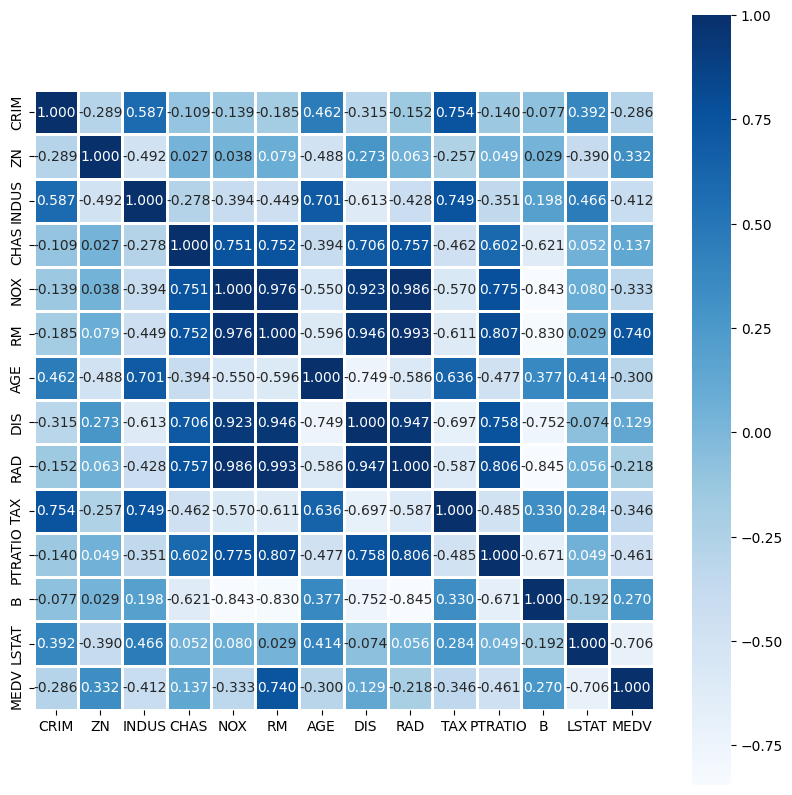

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".3f", cmap="Blues", linewidths=1, square=True)
plt.show()

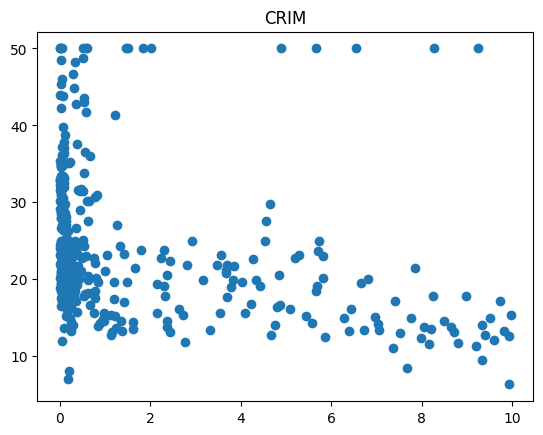

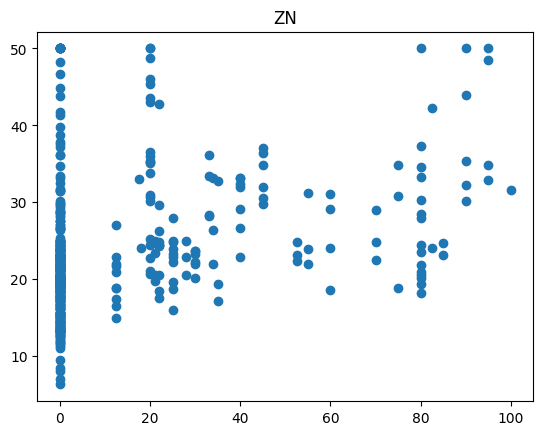

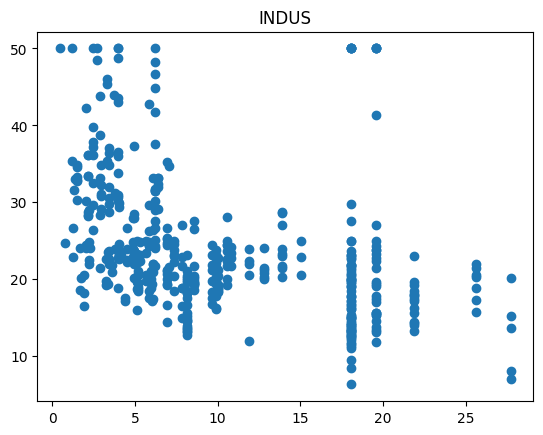

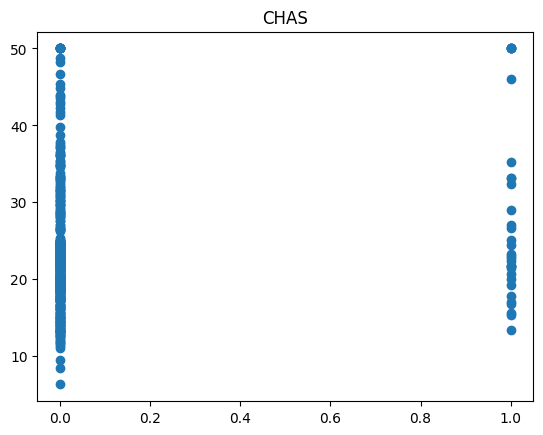

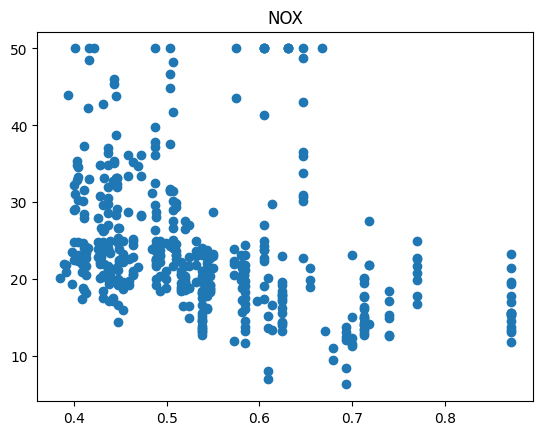

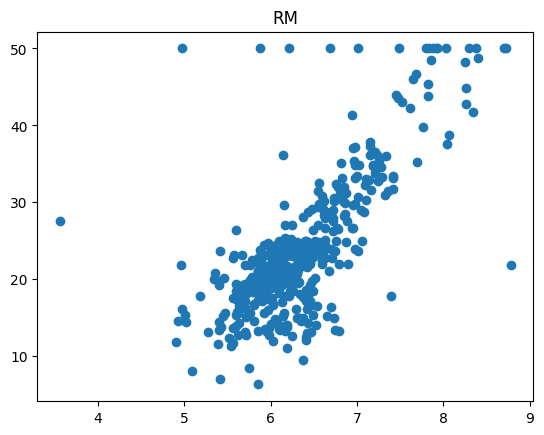

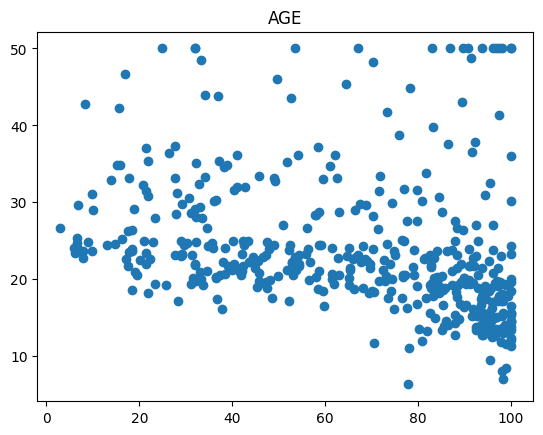

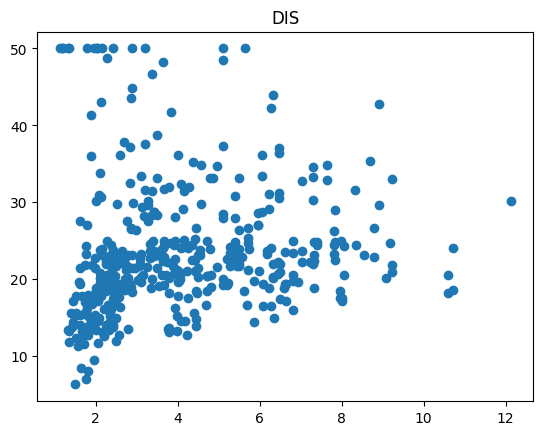

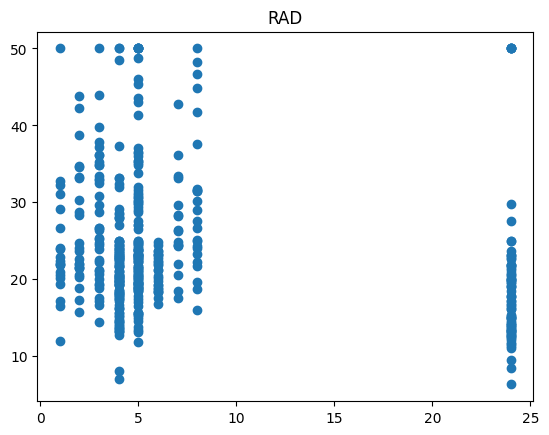

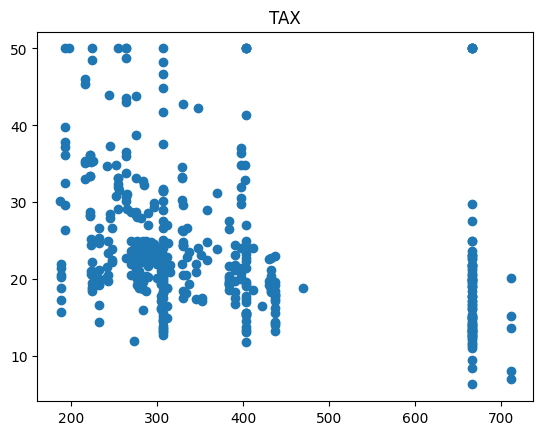

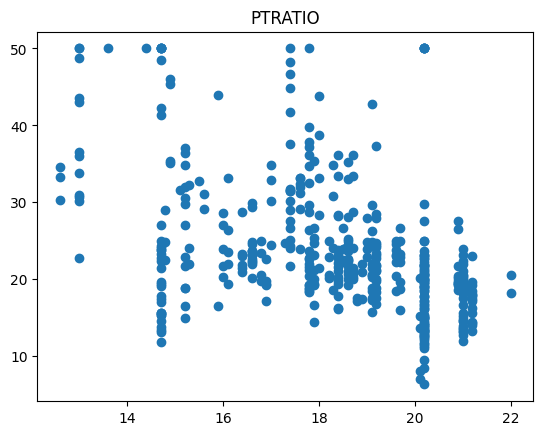

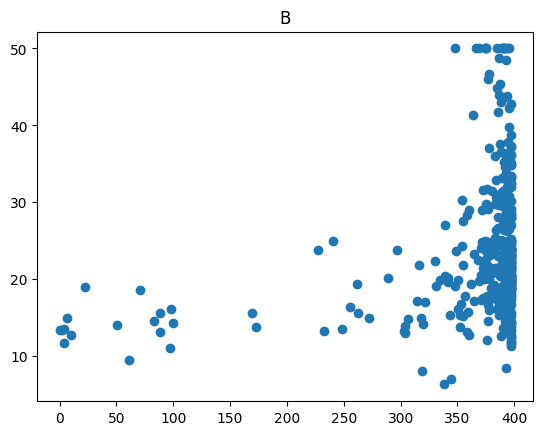

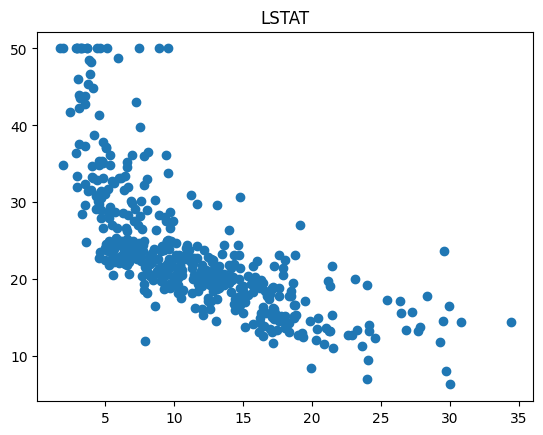

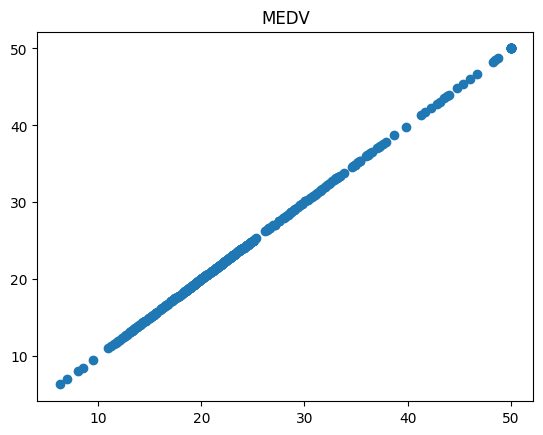

In [11]:
for c_name in columns_name :
  plt.scatter(data[c_name] , data[TARGET])
  plt.title(c_name)
  plt.show()

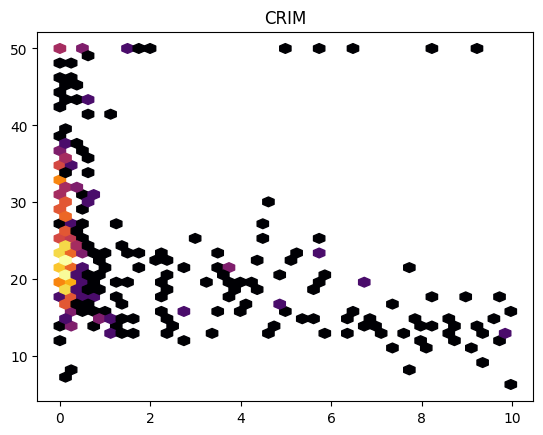

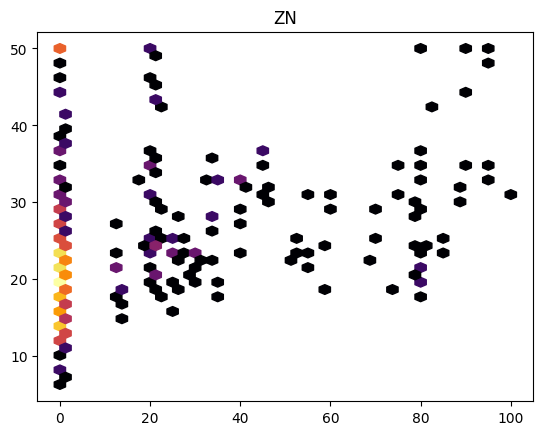

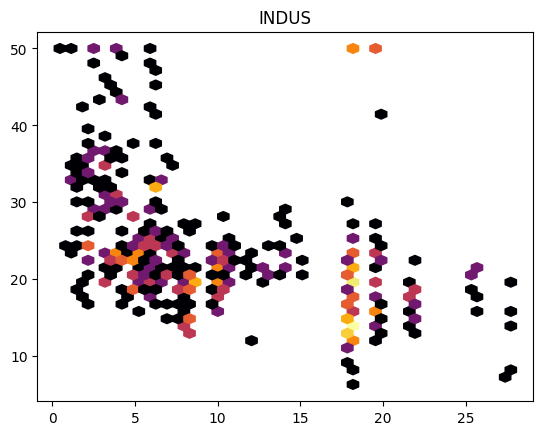

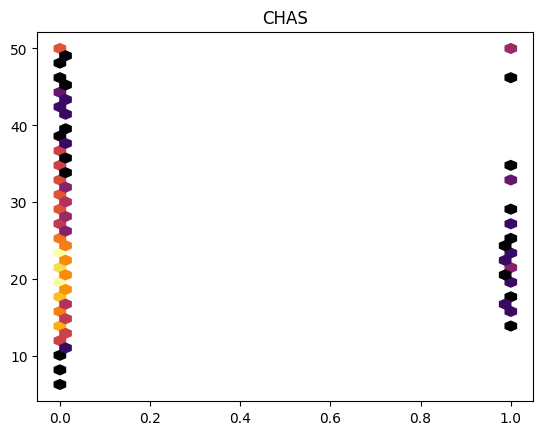

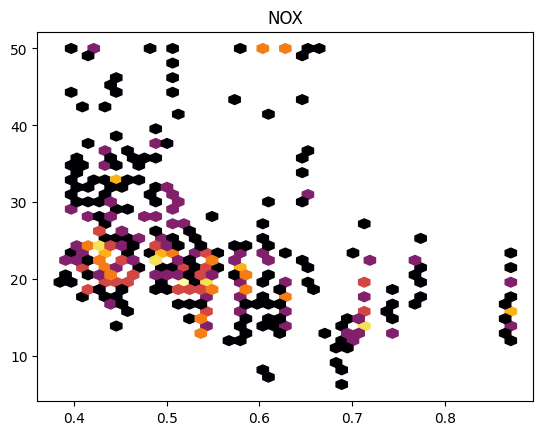

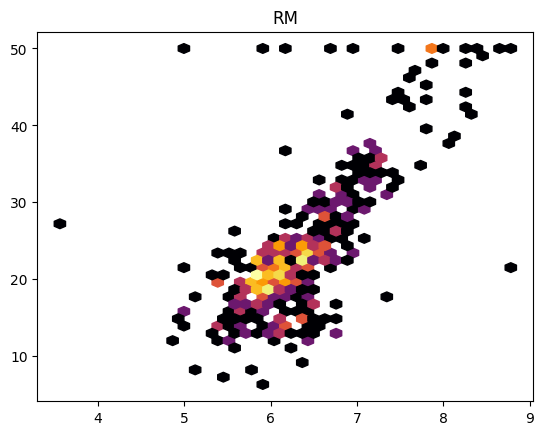

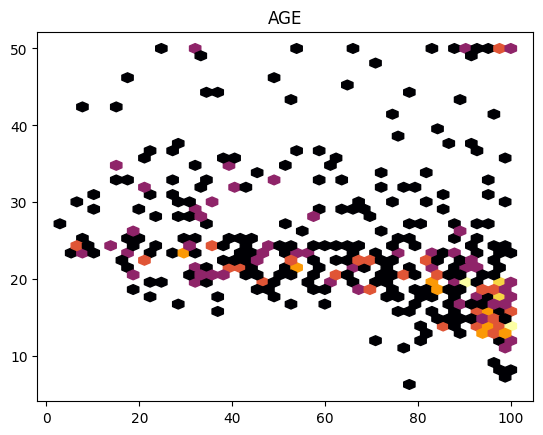

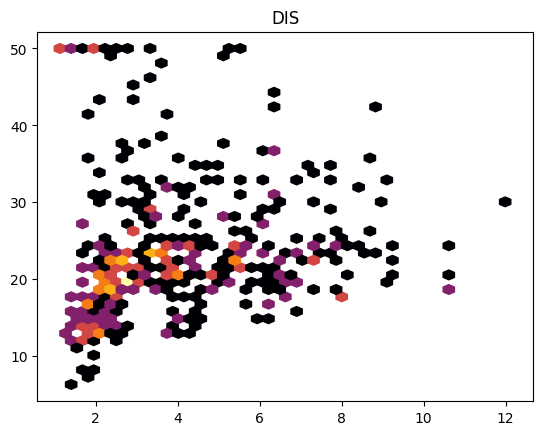

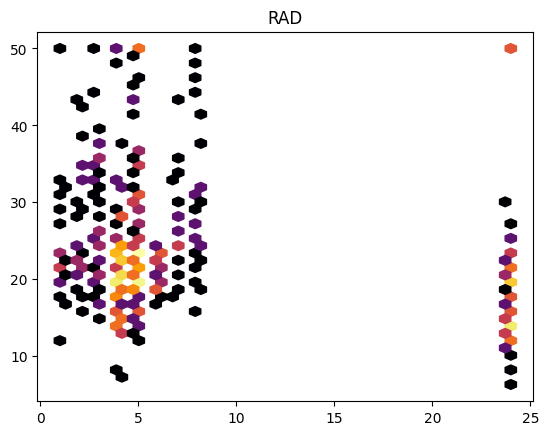

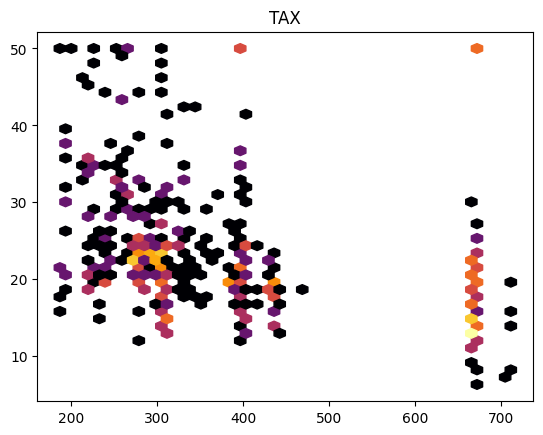

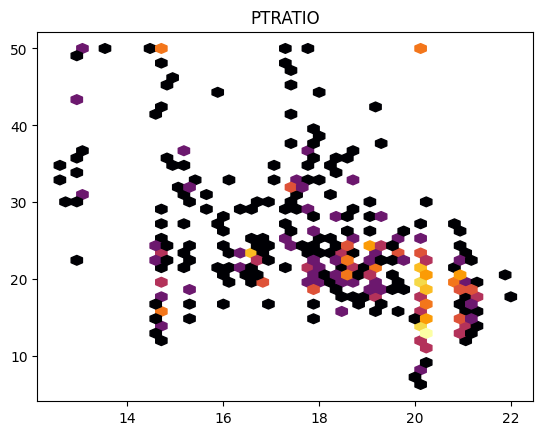

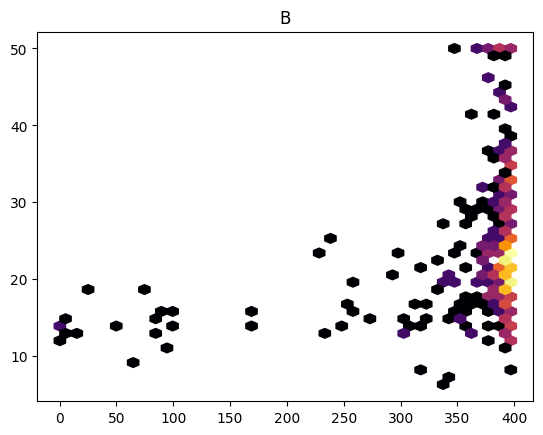

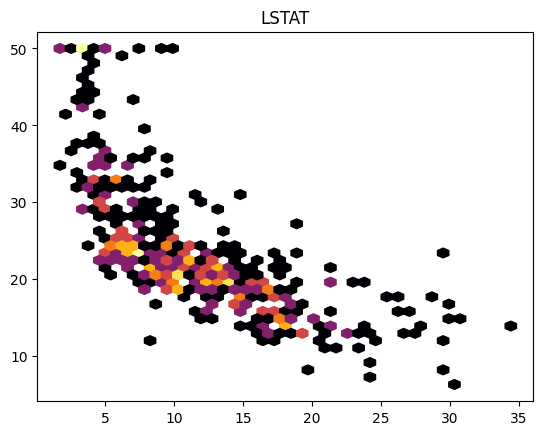

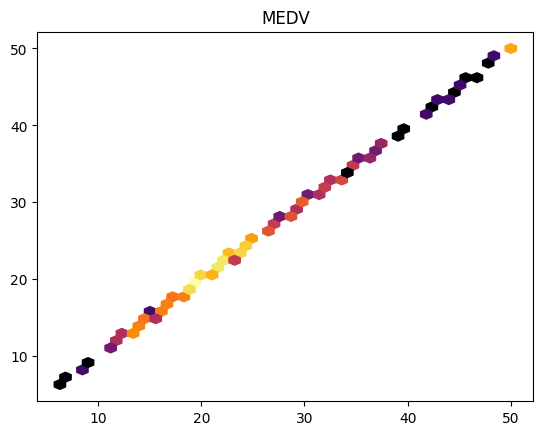

In [12]:
for c_name in columns_name :
  plt.hexbin(data[c_name] , data[TARGET],gridsize = 40 , bins='log' , cmap ='inferno')
  plt.title(c_name)
  plt.show()

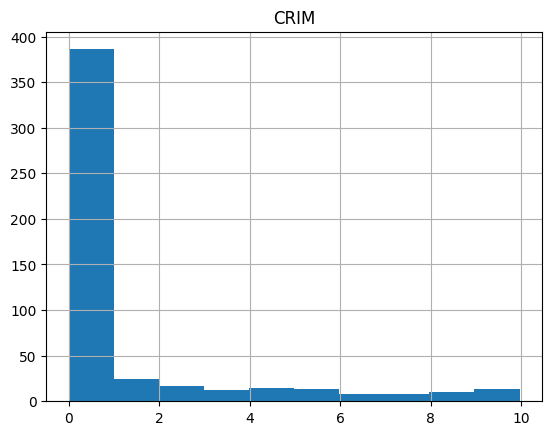

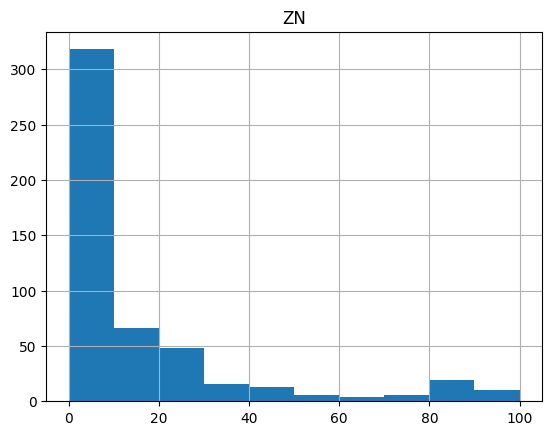

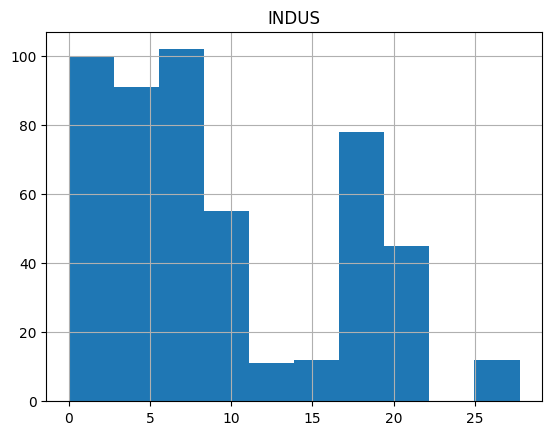

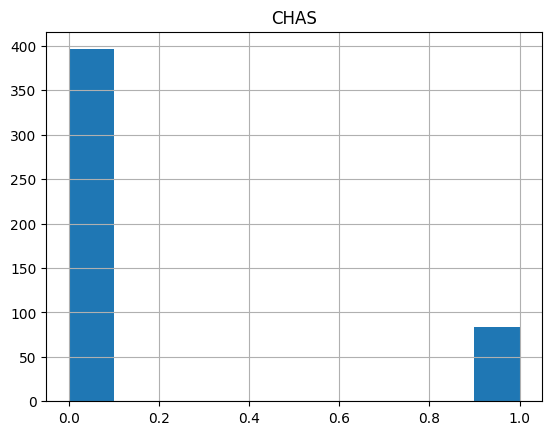

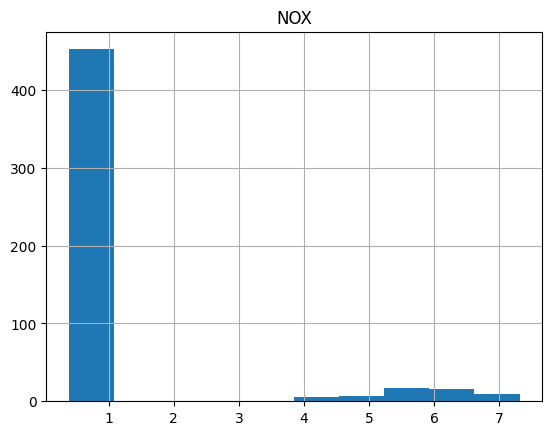

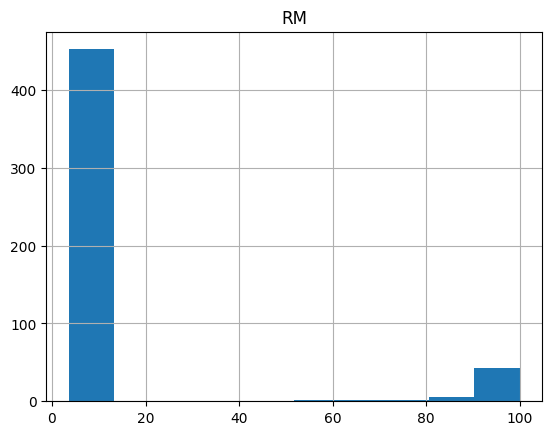

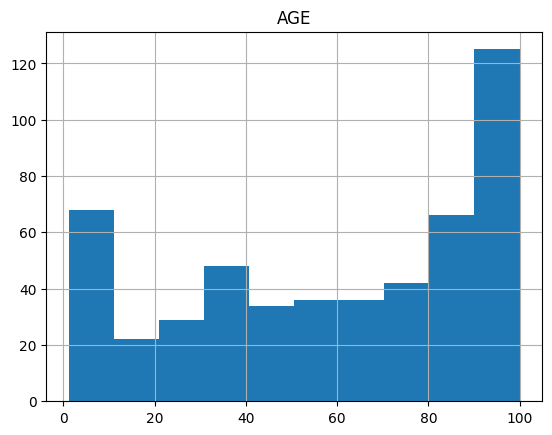

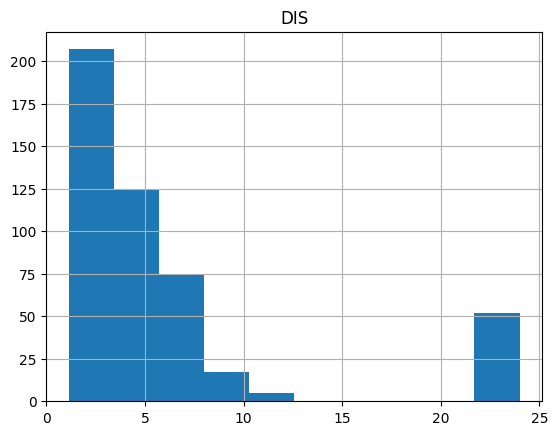

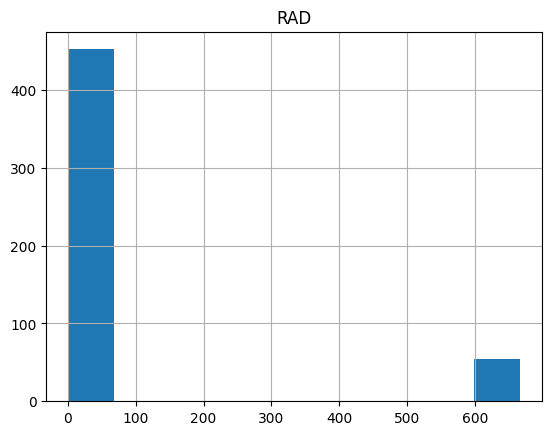

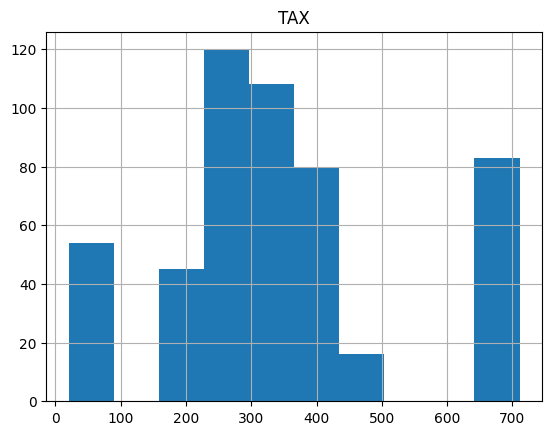

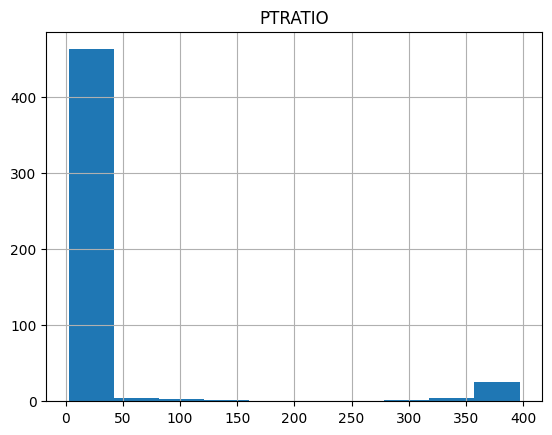

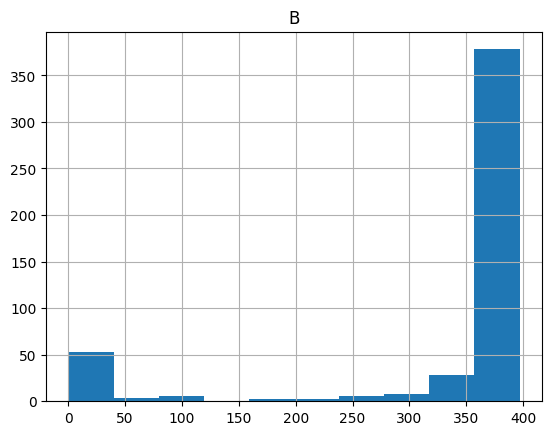

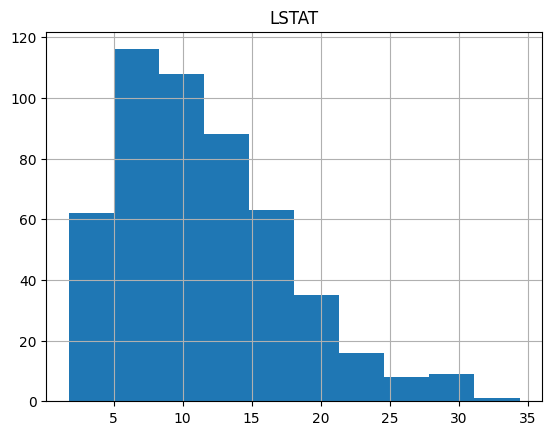

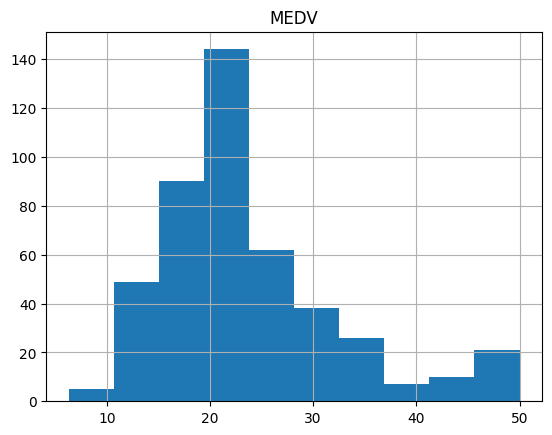

In [14]:
## we can draw histograms
for c in columns_name: 
    data[c].hist()
    plt.title(c)
    plt.show()

the missed row coulbe deleted or replaced using mean/mode/median or find the missed value using KNN or Model-based Imputation

In [17]:
data = data.dropna(subset = [TARGET] , how = "all")

In [18]:
col = data.select_dtypes(include=[np.number,'float']).columns.to_list()
selected_data = data[col]
knn_imputer = KNNImputer(n_neighbors= 5)
imputed_data = knn_imputer.fit_transform(selected_data)
data1 = pd.DataFrame(imputed_data,columns=col)
data2 = data.fillna(data.mean())
data3 = data.fillna(data.median())

In [19]:
data = data2

In [20]:
print(len(data))

452


In [21]:
for i in range(len(columns_name)-2):
  if(abs(corrs_with_target[i])<0.3):
    data = data.drop(columns=[columns_name[i]])

In [22]:
data.head()

ZN  INDUS    NOX     RM    TAX  PTRATIO  LSTAT  MEDV
0  18.0   2.31  0.538  6.575  296.0     15.3   4.98  24.0
1   0.0   7.07  0.469  6.421  242.0     17.8   9.14  21.6
2   0.0   7.07  0.469  7.185  242.0     17.8   4.03  34.7
3   0.0   2.18  0.458  6.998  222.0     18.7   2.94  33.4
4   0.0   2.18  0.458  7.147  222.0     18.7   5.33  36.2

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 505
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ZN       452 non-null    float64
 1   INDUS    452 non-null    float64
 2   NOX      452 non-null    float64
 3   RM       452 non-null    float64
 4   TAX      452 non-null    float64
 5   PTRATIO  452 non-null    float64
 6   LSTAT    452 non-null    float64
 7   MEDV     452 non-null    float64
dtypes: float64(8)
memory usage: 31.8 KB


Normalization:<br/>
- Uses minimum and maximum values for scaling.<br/>
- Scales values between [0, 1] or [-1, 1].<br/>
- Affected by outliers.<br/>
Standardization:<br/>
-Uses mean and standard deviation for scaling.<br/>
-Ensures zero mean and unit standard deviation.<br/>
-Much less affected by outliers.<br/>
In summary, choose the appropriate technique based on your data distribution and problem context. Both normalization and standardization play crucial roles in improving machine learning model performance!

Handling Missing Values:<br/>
Check if there are any missing values in your string columns. You can use df.isnull().sum() to identify them.
Depending on the context, you can either drop rows with missing values or impute them (e.g., using the mean, median, or mode).
Label Encoding:<br/>
For categorical string columns, consider label encoding. It assigns a unique integer to each category. You can use scikit-learn’s LabelEncoder for this.
AI-generated code. Review and use carefully. More info on FAQ.
Text Cleaning and Tokenization:<br/>
If your string columns contain text data (e.g., product descriptions, reviews), consider cleaning and tokenizing the text.
Remove special characters, convert to lowercase, and split sentences into individual words (tokens).
Feature Engineering:<br/>
Create new features based on string columns. For example, extract the length of a string, count the number of words, or create binary features based on specific keywords.
Regular Expressions:<br/>
Use regular expressions to extract relevant information from string columns. For instance, extract dates, phone numbers, or email addresses.
Removing Outliers:<br/>
Detect and handle outliers in numerical columns related to your string data. For example, if you have a “Price” column associated with product names, check for extreme values.

In [24]:
##normalization:
df = data.drop(columns= [TARGET])
targets = data[TARGET]
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [25]:
data.head()

ZN  INDUS    NOX     RM    TAX  PTRATIO  LSTAT  MEDV
0  18.0   2.31  0.538  6.575  296.0     15.3   4.98  24.0
1   0.0   7.07  0.469  6.421  242.0     17.8   9.14  21.6
2   0.0   7.07  0.469  7.185  242.0     17.8   4.03  34.7
3   0.0   2.18  0.458  6.998  222.0     18.7   2.94  33.4
4   0.0   2.18  0.458  7.147  222.0     18.7   5.33  36.2

In [26]:
df.head()

0         1         2         3         4         5         6
0  0.18  0.067815  0.314815  0.577505  0.208015  0.287234  0.099449
1  0.00  0.242302  0.172840  0.547998  0.104962  0.553191  0.226744
2  0.00  0.242302  0.172840  0.694386  0.104962  0.553191  0.070379
3  0.00  0.063050  0.150206  0.658555  0.066794  0.648936  0.037026
4  0.00  0.063050  0.150206  0.687105  0.066794  0.648936  0.110159

<Axes: >

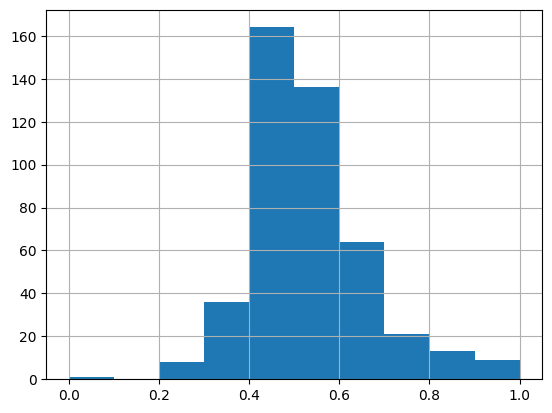

In [27]:
df[3].hist()

Training Set:<br/>
The training set is the portion of your data used to train your machine learning model. It’s where the model learns the underlying patterns and features in the data.
During training, the same training data is repeatedly fed to the model (usually in epochs), allowing it to adjust its internal parameters (weights and biases) to minimize the prediction error.
A diverse training set ensures that the model learns from various scenarios and can generalize well to unseen data.
Validation Set:<br/>
The validation set is a separate dataset used to evaluate the model’s performance during training.
After each training epoch, the model’s performance is assessed on the validation set. This evaluation helps us tune hyperparameters and configurations.
The validation set acts as a “critic,” providing feedback on whether the training is moving in the right direction or if adjustments are needed.
Its primary purpose is to prevent overfitting—where the model becomes too specialized in the training data but fails to generalize to new, unseen data.
Test Set:<br/>
The test set is reserved for the final evaluation of the trained model.
Once the model is fully trained and tuned using the training and validation sets, it is tested on the test set.
The test set simulates real-world scenarios, allowing us to assess how well the model will perform on new, unseen data.
It provides an unbiased estimate of the model’s generalization ability.
Split Ratios:<br/>
Commonly, data is split into three sets: training, validation, and test.
A typical split ratio is 80% training, 10% validation, and 10% test. However, the optimal split depends on factors like the problem domain, model structure, and data dimensionality1.
Adjust the split ratios based on your specific use case and dataset characteristics.

In [72]:
def tran_test_valdition_split(n):
  indexes = list(range(n))
  p = [1/len(df) for _ in indexes]
  train = list( np.random.choice(indexes,362 ,p=p,replace=False))
  remain = list(set(indexes).difference(set(train)))
  p = [1/90 for _ in remain]
  test = list( np.random.choice(remain,45 ,p=p,replace=False))
  validation = list(set(remain).difference(set(test)))
  return train,test,validation

In [73]:
train,test,validation = tran_test_valdition_split(len(df))
print(len(train))

362


In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [86]:
def draw_cm(cm):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.title("Confusion Matrix Heatmap")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.show()
def evaluate_model(PY , TY):
    cm = confusion_matrix(TY , PY)
    draw_cm(cm)
    print(classification_report(TY,PY))



#### q13 
handling outlier : remove or replace

#### q14:
- unsuperwised lerning includeing clustering is what we've done in previous project. In this way our model dont know the true result and cluster data using features
- in superwised learning we provide data with true label for our model so model can make it self better and better deoend on labels
- Semi-supervised learning is a branch of machine learning that combines supervised and unsupervised learning by using both labeled and unlabeled data to train artificial intelligence

#### q15
- in regresion, the real value of data calculated and result is not label, result is a real number that calculated by the inputs

#### q16
- as it mention in the given code we minimize the RSS fucntion using differential calculus and using that formula we can minimizer error and find best line for our data

#### q17
- we can't use just one of this score becuse boath of them are important so one of them show the sum of all errors and one of them compare the best line to avrage line the seconde one is better in the way that it shows how good is the result depending on given data

# Linear Regression

In [31]:
def linear_regression(input, output):
  mean_x = np.mean(input)
  mean_y = np.mean(output)

  numerator = np.sum((input - mean_x) * (output - mean_y))
  denominator = np.sum((input - mean_x) ** 2)
  slope = numerator / denominator
  intercept = mean_y - slope * mean_x
  return slope, intercept
def get_regression_predictions(input, intercept, slope):
    return slope*input +intercept
def get_root_mean_square_error(predicted_values, actual_values):
  return np.sqrt(np.sum(((np.subtract(predicted_values , actual_values)**2)))/len(actual_values))
def get_r2_score(predicted_values, actual_values):
  ssres = np.sum(((np.subtract(predicted_values , actual_values)**2)))

  sstot = np.sum((actual_values - np.mean(actual_values))**2)
  return 1 - (ssres/sstot)


In [32]:
predicted_values = np.array([10, 20, 30, 40])
actual_values = np.array([12, 18, 28, 42])
print(get_r2_score(predicted_values , actual_values))



0.9689922480620154


['ZN', 'INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']


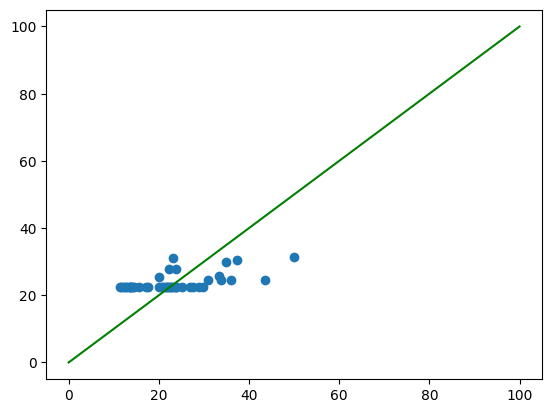

ZN	rmse : 7.542396283133895	 r2 : 0.2511995548840209


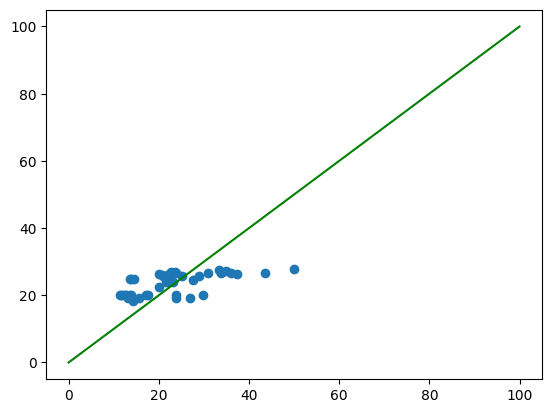

INDUS	rmse : 7.30370387418423	 r2 : 0.2978438349041659


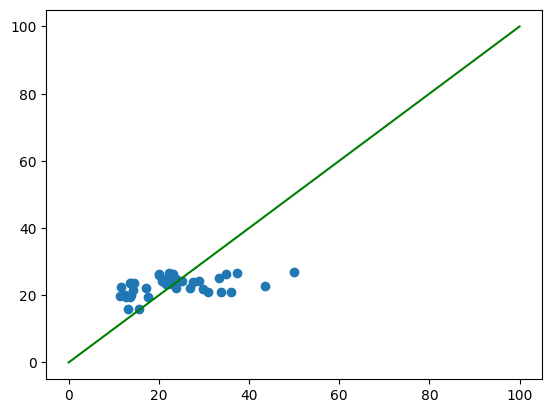

NOX	rmse : 7.886470546835554	 r2 : 0.18132265646499546


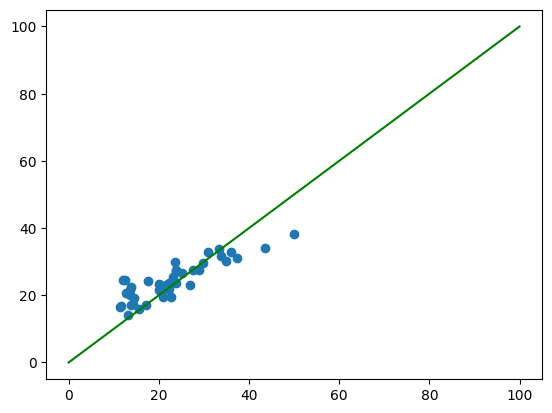

RM	rmse : 4.956928220976852	 r2 : 0.6765756898428671


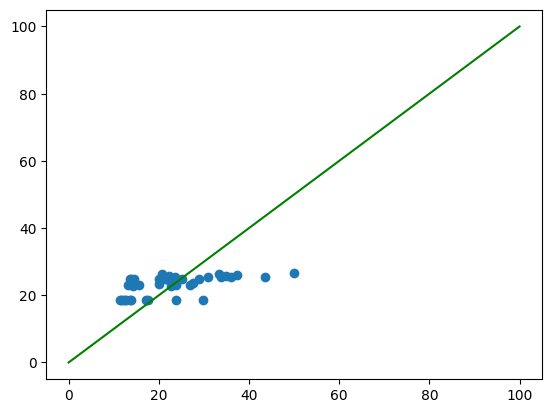

TAX	rmse : 7.510223147272046	 r2 : 0.2575741539509694


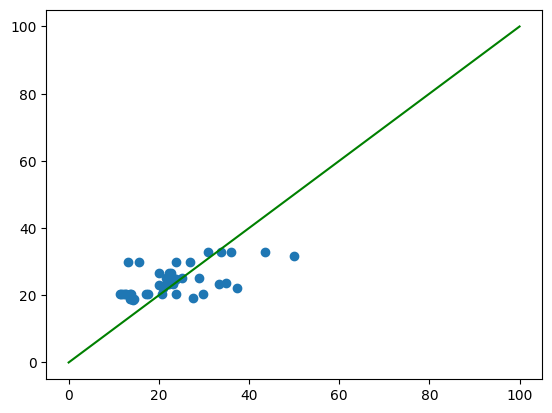

PTRATIO	rmse : 7.153073057482391	 r2 : 0.3265075653412871


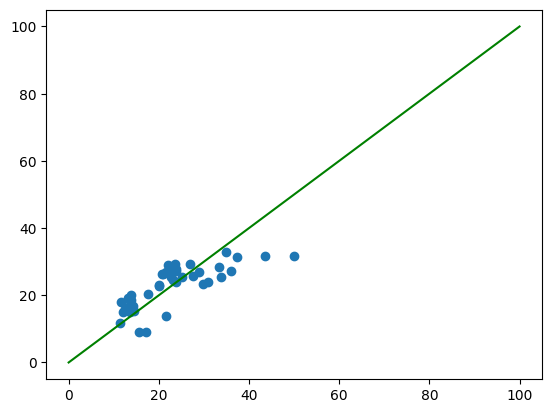

LSTAT	rmse : 5.775437785780097	 r2 : 0.5609467259647863


In [33]:
designated_feature_list = list(data.columns)
designated_feature_list.remove(TARGET)
targets = np.array(targets)
x_values = np.linspace(0, 100, 100)
y_values = x_values
print(designated_feature_list)
for feature in range(len(designated_feature_list)):
  slope,b = linear_regression(np.array(df[feature].iloc[train]),targets[train])
  result_on_test = get_regression_predictions(np.array(df[feature].iloc[test]),b , slope)
  plt.scatter(targets[test],result_on_test)
  plt.plot(x_values,y_values , color = 'g')
  plt.show()
  print(designated_feature_list[feature] +"\trmse : "+ str(get_root_mean_square_error(result_on_test, targets[test])  ) + "\t r2 : " + str(get_r2_score(result_on_test,targets[test])))

#### 21
- Pruning aims to simplify decision trees by removing parts that do not provide significant predictive power.
It prevents overfitting by reducing the complexity of the tree.
The goal is to create a smaller, more accurate, and more effective decision tree.

#### Q22
1. Relatively Easy to Interpret:<br/>
- Trained decision trees are generally intuitive to understand and easy to interpret.<br/>
- Their entire structure can be visualized in a simple flow chart, unlike most other machine learning algorithms.<br/>
Robust to Outliers:<br/>
- A well-regularized decision tree is robust to the presence of outliers in the data.<br/>
- Predictions are generated from an aggregation function (e.g., mean or mode) over a subsample of the training data.<br/>
1. Can Deal with Missing Values:<br/>
- The CART (Classification and Regression Trees) algorithm naturally handles missing values in the data.<br/>
- Decision trees do not require additional preprocessing to treat missing values.<br/>
1. Non-Linear:<br/>
Decision trees are inherently non-linear models.<br/>
They can be applied to a wide range of complex problems where linearity cannot be assumed.<br/>
1. Non-Parametric:<br/>
Decision trees do not make assumptions regarding the underlying distributions in the data.<br/>
No need to worry about whether the model assumptions apply to a given problem.<br/>
1. Combining Features to Make Predictions:<br/>
Combinations of features can be used in making predictions.<br/>
Decision rules (if-else conditions on input features) are combined via AND relationships as one traverses the tree.<br/>
1. Can Deal with Categorical Values:<br/>
Decision trees can handle both categorical and numerical data.<br/>
They are versatile in handling different types of features.<br/>
1. Minimal Data Preparation:<br/>
Decision trees require minimal data preprocessing compared to some other models.<br/>

#### q23
- in knn we dont need to train and always we carry the data with model itself.
#### q24
- it is the KNN with k equals to 1. its good for its speed and its simplicity but it sensetive to outliers and overfitting

#### q25

1. Euclidean Distance:<br/>
- Calculates the straight-line distance between two points.
- Suitable for continuous features.
2. Manhattan Distance (Taxicab Distance):<br/>
- Measures the sum of absolute differences between corresponding coordinates.
- Preferred for high-dimensional data.
3. Cosine Similarity:<br/>
- Measures the cosine of the angle between two vectors.
- Suitable for text data or sparse feature vectors.

In [34]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [35]:
high_threshold = data[TARGET].quantile(0.8)
mid_threshold = data[TARGET].quantile(0.6)

classes = pd.cut(data[TARGET], bins=[-float('inf'), mid_threshold, high_threshold, float('inf')],
                     labels=[0, 1, 2])

In [36]:
data  = data.drop(columns=[TARGET  ])

In [37]:
clf = DecisionTreeClassifier(max_depth=10 , min_samples_leaf=5)
clf.fit(data.iloc[train], classes.iloc[train])


DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

In [89]:
y_pred = clf.predict(data.iloc[validation])

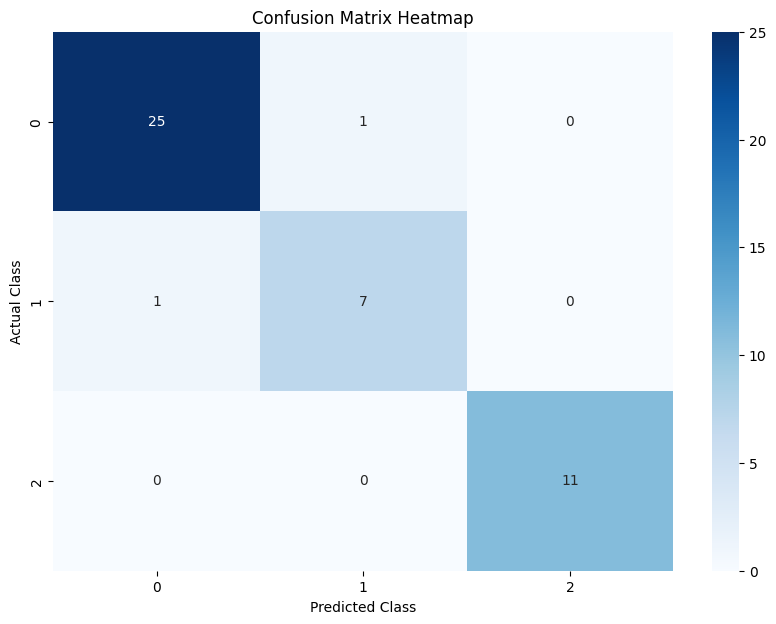

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.88      0.88      0.88         8
           2       1.00      1.00      1.00        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [90]:
evaluate_model(y_pred , classes.iloc[validation])

KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
def fit_and_evaluate_knn(train_data, train_target, k, valid_data, valid_target):
    clf = KNeighborsClassifier(k)
    clf.fit(train_data, train_target)
    valid_pred_target = clf.predict(valid_data)
    accuracy = accuracy_score(valid_target, valid_pred_target)
    return accuracy

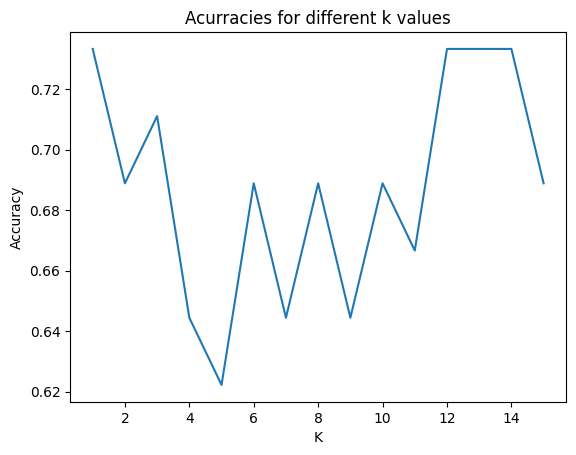

In [42]:
max_k = 15
accuracies = []
k_values = list(range(1, max_k + 1))
for k in k_values:
    train_data = data.iloc[train]
    train_target = classes.iloc[train]

    valid_data = data.iloc[validation]
    valid_target = classes.iloc[validation]

    accuracy = fit_and_evaluate_knn(train_data, train_target, k, valid_data, valid_target)
    accuracies.append(accuracy)

plt.title('Acurracies for different k values')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(k_values, accuracies)

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
X_train = data.iloc[train]
Y_train = classes.iloc[train]

In [ ]:


DecisionTreeGridSearch = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={
        "criterion": ["gini", "entropy"],
        "splitter": ["best", "random"],
        "max_depth": range(2, 20),
        "min_samples_split": range(2, 20),
        "min_samples_leaf": range(2, 20),
        "random_state": [149],
    },
    scoring="accuracy",
    cv= 4,
    n_jobs=-1,
)

DecisionTreeGridSearch.fit(X_train, Y_train)
print(f"Best Parameters are : {DecisionTreeGridSearch.best_params_}")

KeyboardInterrupt: 

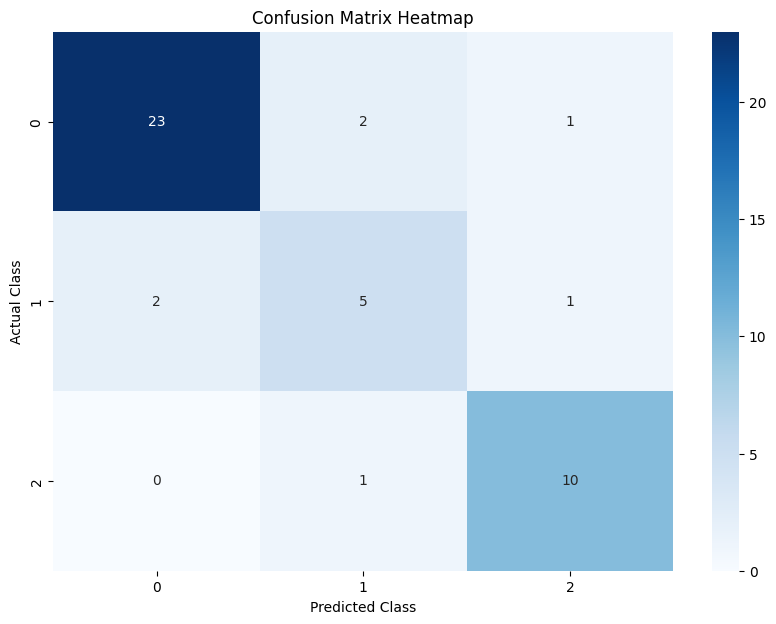

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        26
           1       0.62      0.62      0.62         8
           2       0.83      0.91      0.87        11

    accuracy                           0.84        45
   macro avg       0.79      0.81      0.80        45
weighted avg       0.85      0.84      0.84        45



In [91]:
clf = DecisionTreeClassifier(max_depth=5 , min_samples_leaf=13 , min_samples_split = 2  , criterion = 'entropy' , splitter =  'best')
clf.fit(data.iloc[train], classes.iloc[train])
y_pred = clf.predict(data.iloc[validation])
evaluate_model(y_pred , classes.iloc[validation])

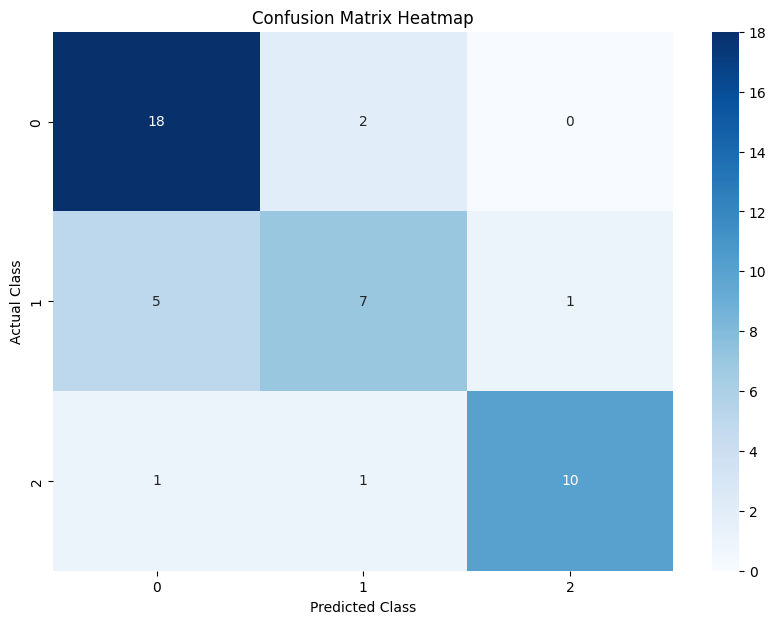

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        20
           1       0.70      0.54      0.61        13
           2       0.91      0.83      0.87        12

    accuracy                           0.78        45
   macro avg       0.79      0.76      0.77        45
weighted avg       0.78      0.78      0.77        45



In [92]:
y_pred = clf.predict(data.iloc[test])
evaluate_model(y_pred , classes.iloc[test])

In [47]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 20), dpi = 500)
plot_tree(clf)

[Text(0.5972222222222222, 0.9166666666666666, 'x[3] <= 6.543\nentropy = 1.362\nsamples = 362\nvalue = [219.0, 75.0, 68.0]'),
 Text(0.3055555555555556, 0.75, 'x[6] <= 10.14\nentropy = 0.821\nsamples = 260\nvalue = [207, 48, 5]'),
 Text(0.16666666666666666, 0.5833333333333334, 'x[5] <= 19.65\nentropy = 1.236\nsamples = 80\nvalue = [39, 37, 4]'),
 Text(0.1111111111111111, 0.4166666666666667, 'x[3] <= 6.168\nentropy = 1.081\nsamples = 60\nvalue = [24, 35, 1]'),
 Text(0.05555555555555555, 0.25, 'entropy = 1.124\nsamples = 25\nvalue = [16, 8, 1]'),
 Text(0.16666666666666666, 0.25, 'x[6] <= 6.825\nentropy = 0.776\nsamples = 35\nvalue = [8, 27, 0]'),
 Text(0.1111111111111111, 0.08333333333333333, 'entropy = 0.503\nsamples = 18\nvalue = [2, 16, 0]'),
 Text(0.2222222222222222, 0.08333333333333333, 'entropy = 0.937\nsamples = 17\nvalue = [6, 11, 0]'),
 Text(0.2222222222222222, 0.4166666666666667, 'entropy = 1.054\nsamples = 20\nvalue = [15, 2, 3]'),
 Text(0.4444444444444444, 0.5833333333333334, '

#### q29

#### q30
Ensemble methods play a crucial role in machine learning, offering several advantages that enhance model performance and robustness. Let’s explore why ensemble methods are both useful and important:

Improved Predictive Accuracy:
Ensemble methods combine multiple base models (learners) to create a stronger overall predictor.
By aggregating predictions from diverse models, ensemble methods reduce bias and variance, leading to better accuracy.
They often outperform individual models, especially when the base models have complementary strengths.
Robustness and Stability:
Ensemble methods are less sensitive to noise and outliers in the data.
Even if some base models make incorrect predictions, the ensemble can still provide reliable results.
Robustness is essential for real-world applications where data quality varies.
Reduced Overfitting:
Overfitting occurs when a model learns the training data too well and performs poorly on unseen data.
Ensemble methods, such as bagging and random forests, reduce overfitting by averaging or combining multiple models.
They prevent individual models from memorizing noise in the training data.
Handling Model Uncertainty:
Ensemble methods provide a measure of uncertainty by considering multiple hypotheses.
When different base models agree on a prediction, the ensemble is more confident.
When base models disagree, the ensemble reflects uncertainty.
Flexibility and Adaptability:
Ensemble methods can incorporate various types of base models (e.g., decision trees, neural networks, SVMs).
They adapt well to different problem domains and data characteristics.
Types of Ensemble Methods:
Bagging (Bootstrap Aggregating): Combines bootstrapped samples of data and aggregates predictions.
Boosting: Builds models sequentially, adjusting weights based on performance.
Random Forests: A popular ensemble method that combines decision trees using bagging.

#### q31
Bagging (Bootstrap Aggregating):
Bagging is an ensemble learning technique designed to improve the stability and accuracy of machine learning algorithms.
It combines multiple models (usually decision trees) to create a stronger predictive model.
The basic idea behind bagging is to learn a set of classifiers (experts) independently in parallel and then combine their predictions.
Key points about bagging:
Bootstrap Sampling: Bagging involves creating multiple subsets (bootstrap samples) from the original dataset by randomly selecting observations with replacement.
Parallel Training: Each subset is used to train a base model (e.g., decision tree) independently.
Voting or Averaging: The final predictions are determined by combining the predictions from all the base models (e.g., majority voting or averaging).
Example: Random Forest is a popular ensemble model that uses bagging, where multiple decision trees with random feature selection are combined.
Boosting:
Boosting is another ensemble modeling technique that aims to build a strong classifier from a sequence of weak classifiers.
Unlike bagging, boosting works sequentially and adaptively.
Key points about boosting:
Sequential Learning: Boosting builds models sequentially, with each new model correcting the errors made by the previous ones.
Weighted Voting: Each model is assigned a weight based on its performance, and their predictions are combined using weighted averaging.
Adaptive Learning: Boosting focuses on improving the performance of individual models by adjusting their weights.
Example: AdaBoost (Adaptive Boosting) is a well-known boosting algorithm that combines weak learners (e.g., decision stumps) to create a strong model.
In summary:

Bagging reduces variance and helps avoid overfitting by averaging predictions from multiple models.
Boosting focuses on improving model accuracy by iteratively adjusting the weights of individual models.

#### q32
in this way we make a lot of we make bunch of decision trees and we do a voting between them for the final result

#### q33
Bootstrapping is a statistical resampling technique used in the context of Random Forests (RF) and other ensemble methods. Let’s explore how bootstrapping works and its role in building Random Forests:

Bootstrapping:
Bootstrapping involves randomly sampling data from a dataset with replacement.
Given an original dataset, bootstrapping generates multiple subsets (called “bags”) by randomly selecting observations from the original data.
Each bag contains some of the original data points, and some points may appear more than once (due to replacement).
Bootstrapping allows us to create new training sets without collecting additional data.
Random Forests and Bootstrapping:
Random Forests are an ensemble learning method that combines multiple decision trees.
Each decision tree in a Random Forest is trained on a different bootstrapped sample (bag) from the original dataset.
The idea is to create diverse trees by introducing randomness through bootstrapping.
By aggregating predictions from these diverse trees, Random Forests reduce overfitting and improve generalization.
Out of Bag (OOB) Samples:
Since each tree is trained on a different bag, some data points are left out (out of bag).
These out-of-bag samples are used for validation during training.
OOB samples help estimate the model’s performance without the need for a separate validation set.

#### q34
yes its effective "the more the better"a wised man said. but we have trade of between the time and variance :) <br >
خير الأمور أوسطها
 <br > 50 trees to 400 trees.

#### q35
Small Datasets, Interpretability, Sparse Data, Non-Axis-Aligned Decision Boundaries, Computation Time

#### q36
it decreases variance but it increase bias

#### q37

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
DecisionTreeGridSearch = GridSearchCV(
    estimator=RandomForestClassifier(bootstrap=True),
    param_grid={
        "n_estimators": [100, 200, 300, 400],
        "max_depth": range(2, 10),
        "min_samples_split": range(2, 10),
        "min_samples_leaf": range(2, 10),
        "random_state": [149],
    },
    scoring="accuracy",
    cv= 3,
    n_jobs=-1,
)



In [ ]:
DecisionTreeGridSearch.fit(X_train, Y_train)
print(f"Best Parameters are : {DecisionTreeGridSearch.best_params_}")

Best Parameters are : {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 100, 'random_state': 149}


In [50]:
best_params_ = {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 100, 'random_state': 149}

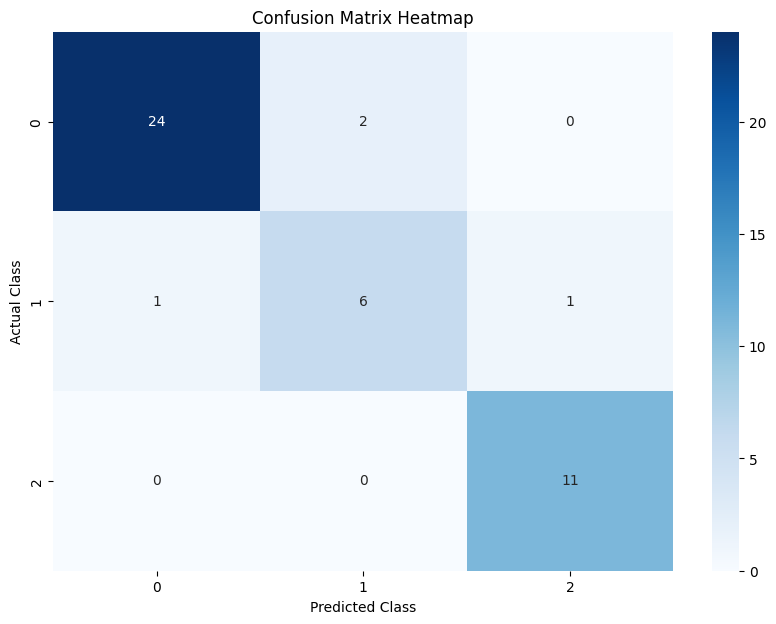

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        26
           1       0.75      0.75      0.75         8
           2       0.92      1.00      0.96        11

    accuracy                           0.91        45
   macro avg       0.88      0.89      0.88        45
weighted avg       0.91      0.91      0.91        45



In [93]:
clf = RandomForestClassifier(**best_params_)
clf.fit(data.iloc[train], classes.iloc[train])
y_pred = clf.predict(data.iloc[validation])
evaluate_model(y_pred , classes.iloc[validation])

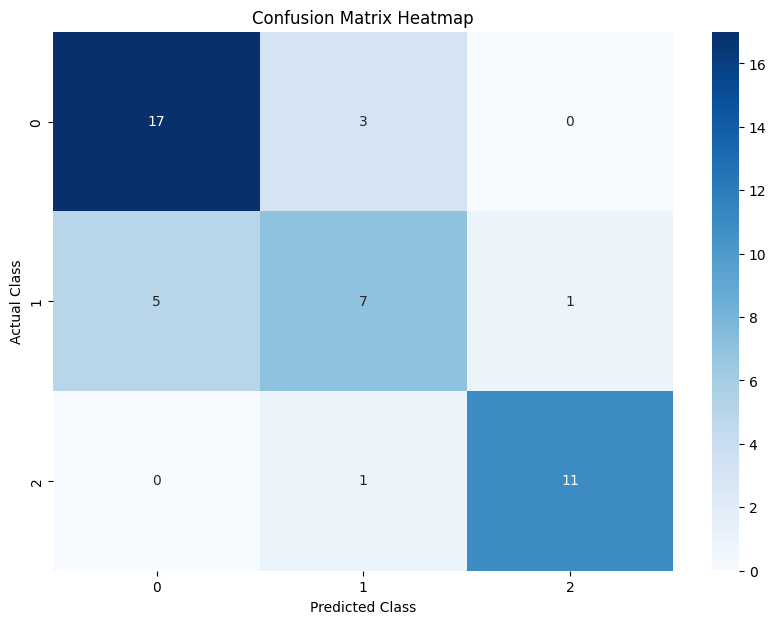

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.64      0.54      0.58        13
           2       0.92      0.92      0.92        12

    accuracy                           0.78        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.77      0.78      0.77        45



In [94]:
y_pred = clf.predict(data.iloc[test])
evaluate_model(y_pred , classes.iloc[test])

#### q38 , 39
 XGBoost, short for eXtreme Gradient Boosting, is a powerful machine learning algorithm known for its efficiency, speed, and accuracy. It belongs to the family of boosting algorithms, which are ensemble learning techniques that combine the predictions of multiple weak learners


1. Ensemble Learning:
- Ensemble methods combine the predictions of multiple individual models (often called “weak learners”) to create a stronger overall prediction.
- The idea is that by combining several models, we can mitigate the weaknesses of any single model and achieve better performance.
2. Gradient Boosting:
- Gradient boosting is a specific type of ensemble learning where models are trained sequentially.
- In each iteration, a new model is trained to correct the errors made by the previous models.
The predictions of all models are combined to create the final ensemble prediction.
3. XGBoost:
- XGBoost stands out due to its efficiency, scalability, and ability to handle large datasets.
- It utilizes decision trees as base learners.

1. Decision Trees:
- A decision tree is a simple, hierarchical structure used for decision-making.
- It consists of nodes (representing features or attributes), edges (connecting nodes), and leaves (representing outcomes or predictions).
- Each internal node tests a specific feature, and the edges lead to child nodes based on the feature’s value.
- Decision trees are easy to understand visually and provide clear paths for decision-making.<br/>
&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   However, they have several limitations:
- &nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.1 Overfitting: Decision trees can become too complex and fit the training data too closely, leading to poor generalization on unseen data.
- &nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.2 High Variance: Small changes in the training data can result in significantly different trees.
- &nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.3 Bias: Restricting the decision tree can introduce bias.
In summary, decision trees are simple but prone to overfitting and high variance.
2. Boosted Trees (Gradient Boosting):
- Gradient boosting is an ensemble technique that combines multiple decision trees.
- Unlike random forests (which build trees independently), gradient boosting builds trees sequentially.<br/>
 Here’s how it works:
- Start with an initial model (often a simple decision tree).
- Compute the residuals (differences between actual and predicted values) for this model.
- Train a new decision tree to predict these residuals (i.e., the gradient).
- Add the new tree’s predictions to the ensemble.
- Repeat the process, updating the ensemble with each new tree.

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
XGBoostGridSearch = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid= {
        "learning_rate":np.arange(0.1, 0.5, 0.1),
        "n_estimators": [100,200,300,500],
        "min_samples_split": range(2, 10),
        "min_samples_leaf": range(2, 10),
        "max_depth": range(2, 6),
        "max_features" : ["sqrt", "log2" , None],
        "random_state": [149],
    },
    scoring="accuracy",
    cv= 3,
    n_jobs=-1,
)


In [56]:
XGBoostGridSearch.fit(X_train , Y_train)
print(f"Best Parameters are : {XGBoostGridSearch.best_params_}")

Best Parameters are : {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 100, 'random_state': 149}


In [55]:
best_params1 = {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 100, 'random_state': 149}

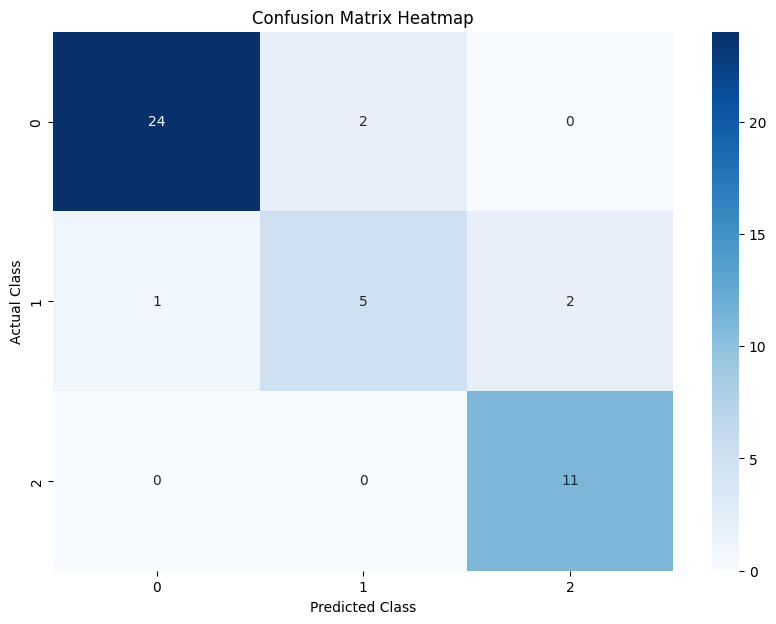

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        26
           1       0.71      0.62      0.67         8
           2       0.85      1.00      0.92        11

    accuracy                           0.89        45
   macro avg       0.84      0.85      0.84        45
weighted avg       0.89      0.89      0.89        45



In [95]:
clf = GradientBoostingClassifier(**best_params1)
clf.fit(data.iloc[train], classes.iloc[train])
y_pred = clf.predict(data.iloc[validation])
evaluate_model(y_pred , classes.iloc[validation])

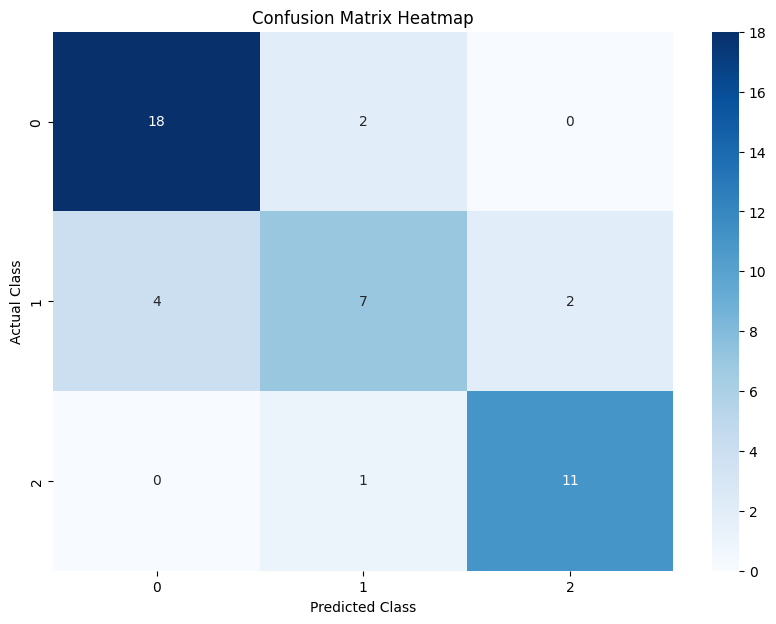

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.70      0.54      0.61        13
           2       0.85      0.92      0.88        12

    accuracy                           0.80        45
   macro avg       0.79      0.79      0.78        45
weighted avg       0.79      0.80      0.79        45



In [96]:
y_pred = clf.predict(data.iloc[test])
evaluate_model(y_pred , classes.iloc[test])

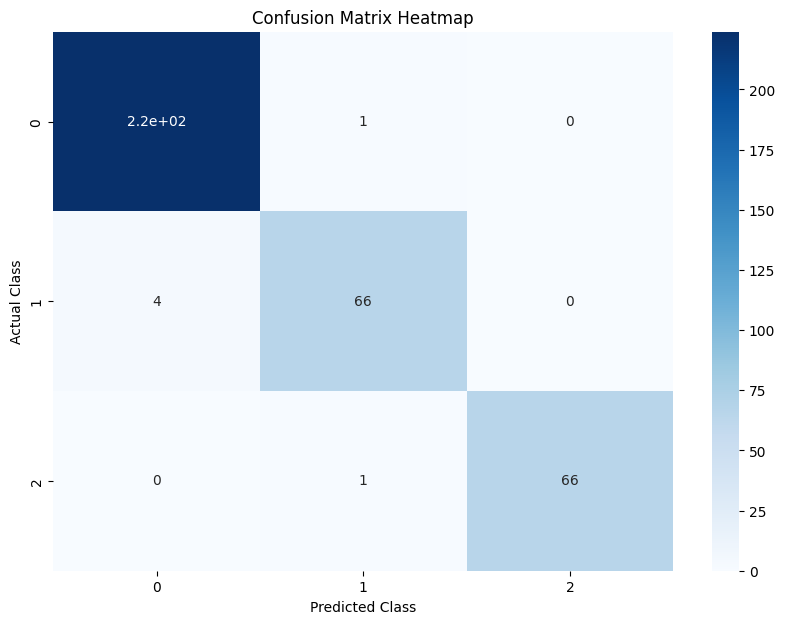

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       225
           1       0.97      0.94      0.96        70
           2       1.00      0.99      0.99        67

    accuracy                           0.98       362
   macro avg       0.98      0.97      0.98       362
weighted avg       0.98      0.98      0.98       362



In [97]:
y_pred = clf.predict(data.iloc[train])
evaluate_model(y_pred , classes.iloc[train])

In [59]:
from sklearn import svm

In [60]:
RBF = svm.SVC(kernel='rbf')
LINEAR = svm.SVC(kernel="linear")

In [74]:
X_TEST = df.iloc[test]
Y_TEST = classes.iloc[test]

In [75]:
RBF.fit(X_train , Y_train);
LINEAR.fit(X_train , Y_train);


In [76]:
YRBP_TEST = RBF.predict(X_TEST)
YLINEAR_TEST = LINEAR.predict(X_TEST)


C:\Users\Hot-f\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Hot-f\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


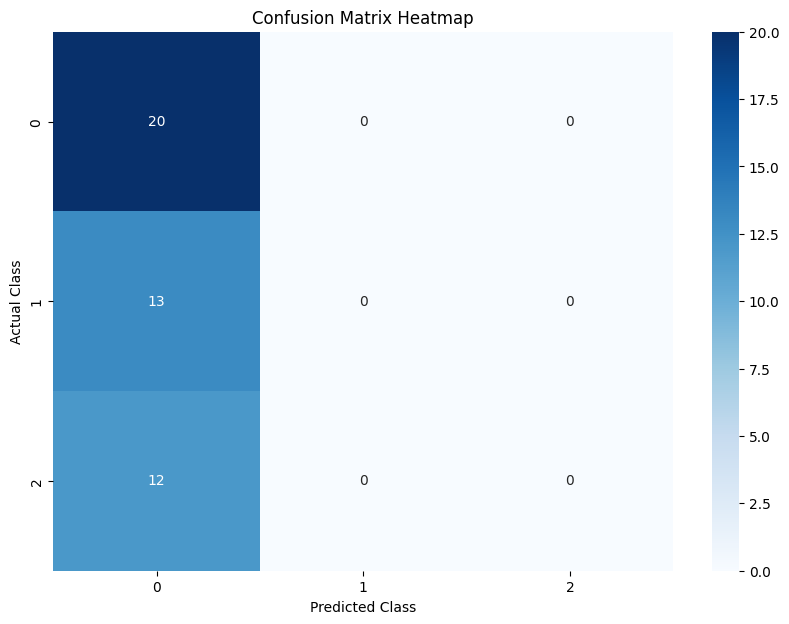

              precision    recall  f1-score   support

           0       0.44      1.00      0.62        20
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        12

    accuracy                           0.44        45
   macro avg       0.15      0.33      0.21        45
weighted avg       0.20      0.44      0.27        45



C:\Users\Hot-f\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hot-f\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hot-f\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

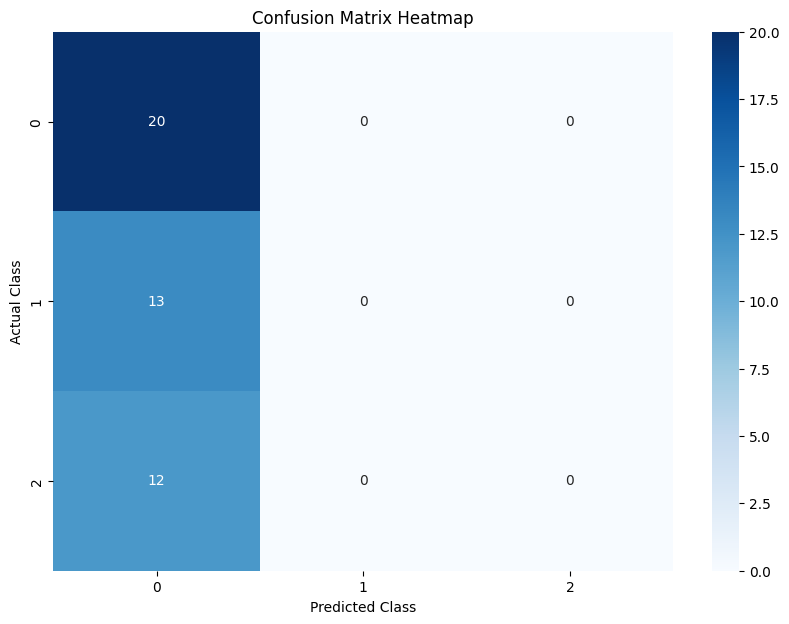

              precision    recall  f1-score   support

           0       0.44      1.00      0.62        20
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        12

    accuracy                           0.44        45
   macro avg       0.15      0.33      0.21        45
weighted avg       0.20      0.44      0.27        45



C:\Users\Hot-f\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hot-f\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hot-f\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

In [98]:
evaluate_model(YRBP_TEST , classes.iloc[test])
evaluate_model(YLINEAR_TEST , classes.iloc[test])